<a href="https://colab.research.google.com/github/magambomaurice93/use-of-pandas-in-machine-learning-/blob/main/lecture_4_Exploratory_Data_Analysis_Univariate_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis  
Why do we visualize data?  
I am sure we have all heard the common saying that **a picture is worth a thousand words**. In many cases it is easier to perceive things visually than by text and numbers.
Consider the example below:  
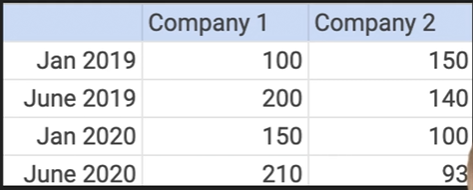  

It may be easier to summarize the findings using the  findings with a line plot  




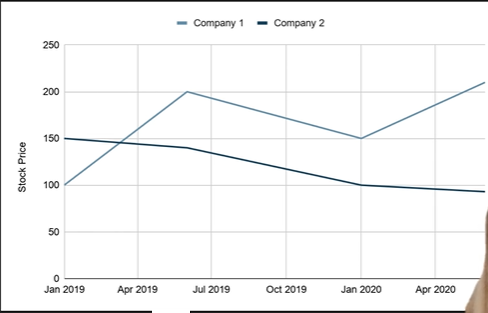  
A line plot may communicate the information better.

Why Python for Data Visualization


*   Automation
*   Statistical Inference



Python Visualization Libraries


*   Matplotlib - one of the most popular and oldest visualization libraries in python.
*   Seaborn - common wrapper used alongside matplotlib.



Pyplot graphs

In [1]:
# Import libraries
import pandas as pd
# `plt` is an alias for the `matplotlib.pyplot` module
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


plt.plot() function -  it takes multiple data structures such as lists and even dataframe columns.  It expects an 2 parameters (X and Y)

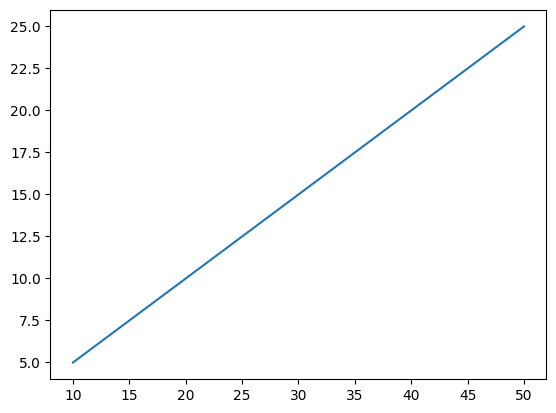

In [3]:
# Not the prettiest plot
x = [10, 20, 30, 40, 50]
y = [5, 10, 15, 20, 25]
plt.plot(x, y)

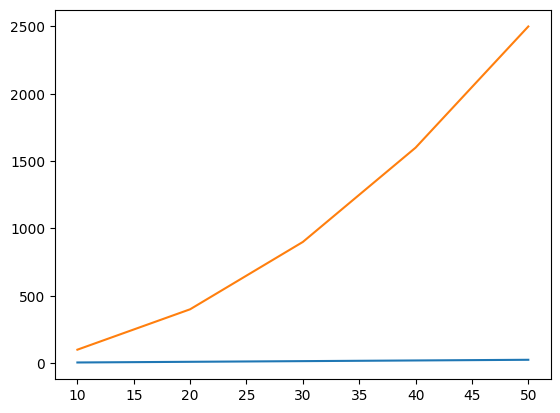

In [4]:
# You can also multiple lines on the same graph
plt.plot([10, 20, 30, 40, 50], [5, 10, 15, 20, 25])
plt.plot([10, 20, 30, 40, 50], [100, 400, 900, 1600, 2500])

plt.bar()

<BarContainer object of 5 artists>

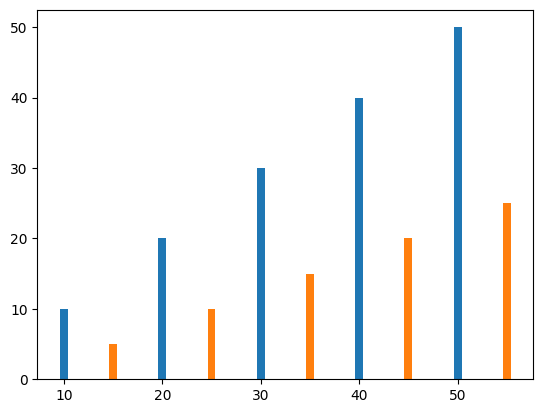

In [5]:
plt.bar([10, 20, 30, 40, 50], [10, 20, 30, 40, 50])
plt.bar([15, 25, 35, 45, 55], [5, 10, 15, 20, 25])

Practise: how can we plot multiple bar graphs?

plt.scatter()

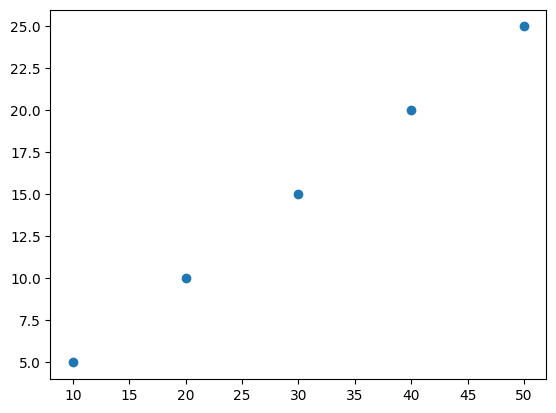

In [6]:
plt.scatter([10, 20, 30, 40, 50], [5, 10, 15, 20, 25])

### Let's load some data in a dataframe and make plots

In [7]:
# Loading csv data directly from URL
url="https://docs.google.com/spreadsheets/d/e/2PACX-1vQPk0YEO46WmL9yZSuO-2lTnTrfFz9keW4ittWKP0RkRpNwrpJkK9tlM11AIui4RSEeJlP9YlLtLOJS/pub?output=csv"
df = pd.read_csv(url)

# Show first 5 rows
df.head()

,Time (hours),Runner 1 Distance,Runner 2 Distance
0,0.0,0.0,0.0
1,0.5,2.5,3.1
2,1.0,5.0,7.3
3,1.5,7.5,12.7
4,2.0,10.0,18.0


In [8]:
# Get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Time (hours)       7 non-null      float64
 1   Runner 1 Distance  7 non-null      float64
 2   Runner 2 Distance  7 non-null      float64
dtypes: float64(3)
memory usage: 296.0 bytes


Matplotlib is powerful but can be a bit confusing at times because it has two different syntaxes (two sets of commands):

* The pyplot functions (`plt.bar()`,`plt.title()`) - Functional Approach
* The object-oriented methods (`ax.bar()`,`ax.set_title()`)  

The two syntaxes can cause problems & odd results when mixed together without understanding their differences.

The developers who make Matplotlib recommend using the object-oriented approach. Therefore, we will focus primarily on the Object-Oriented Programming (OOP) approach to plotting with Matplotlib.

Starting a Matplotib Figure (OOP method)
* In order to use the OOP syntax for Matplotlib, we must first create a Figure and Axes object. We will then use these objects to execute the commands for producing and customizing our visualizations.
* The best way to start a Matplotlib figure is to use plt.subplots().
  * Note the "s" at the end of plt.subplots(). This is different than plt.subplot() without the s.
  * Even though we are using the plural plt.subplots(), the default will allow for the creation of a single plot.

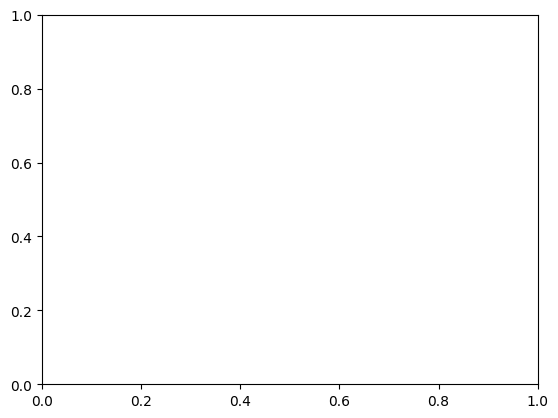

In [9]:
# Make an empty figure and ax with plt.subplots
fig, ax = plt.subplots()

### Anatomy of a Figure
* Matplotlib Figures are composed of 2 primary types of objects:
  - A `Figure` object:
    - The largest "bucket" that will contain the plot(s).
    - It is like a picture frame without any actual images in it.
* One or More `Axes`:
  8 Axes are the actual plot/image inside of the Figure/frame. (The area your plot appears in)
  * There is an 'Axes` object for each subplot in the Figure.
    * This is the same `ax` as in `fig, ax = plt.subplots()`


<img src="https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/1677111798__anatomy-figure.webp" style=" display: block; margin-left: auto; margin-left: right; width: 50%;">

* Each "Axes" (`ax`) contains a y-axis and an x-axis. Both the x-axis and y-axis are `Axis`objects.
  * They contain the ticks and tick labels for the x-axis and y-axis.
* Note: the naming convention for Axes (the entire plot) vs. Axes (the plural of "axis" referring to specifically the x-axis and y-axis of a particular plot) is a bit confusing. The x-axis and y-axis are just a few of the properties of an axes ('ax') object.



### Anatomy of an Axes (A.K.A. a subplot)
Within the Axes (the `ax` from `fig, ax = plt.subplots()`), there are many individual elements that we can customize.

<img src="https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/1677111874__matplotlib_Axes_layout2.png" width="500px">

[Adapted From](https://matplotlib.org/2.0.2/examples/showcase/anatomy.html)

**Line plot with ax.plot()**
The ax.plot() method will create a line plot. It accepts various Python data structures, including lists, tuples, NumPy arrays, and columns from pandas DataFrames. Determine what data you want on each axis of the graph and then assign it using `ax.plot(x, y)`.

The code below saves the Time column from our dataframe as X and Runner #1's distance as y1 before plotting them with ax.plot().

In [10]:
# Our data
df.head(3)

,Time (hours),Runner 1 Distance,Runner 2 Distance
0,0.0,0.0,0.0
1,0.5,2.5,3.1
2,1.0,5.0,7.3


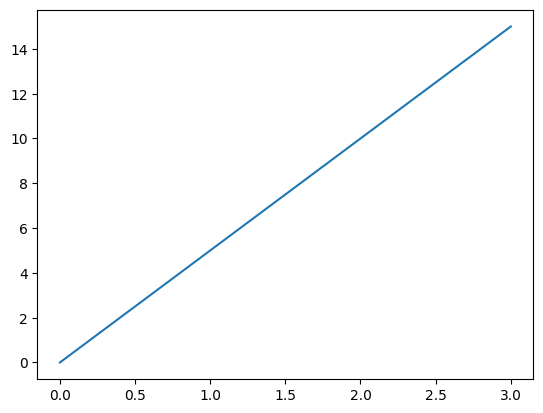

In [12]:
# Plotting a line of Runner 1's distance over time
X = df['Time (hours)']
y1 = df['Runner 1 Distance']
# create the figure and ax
fig, ax = plt.subplots()
ax.plot(X, y1)

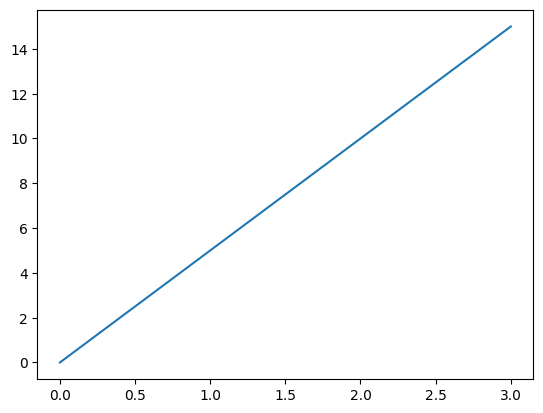

In [13]:
# print(X)
# print(y1)
plt.plot(X, y1);

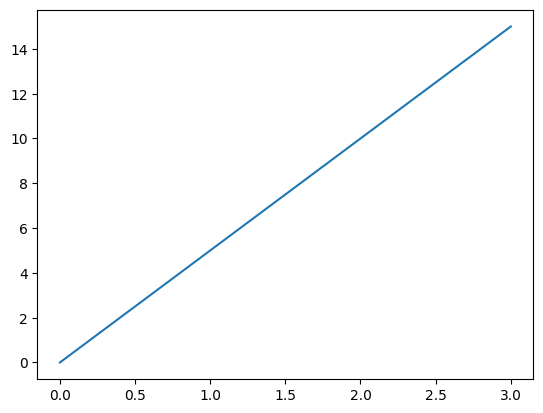

In [14]:
# Add a ";" at the end of the subplot() method command to supress the text output
fig, ax = plt.subplots()
ax.plot(X, y1);

You can also plot another line on the same graph, just add to the axes returned by the subplot method.




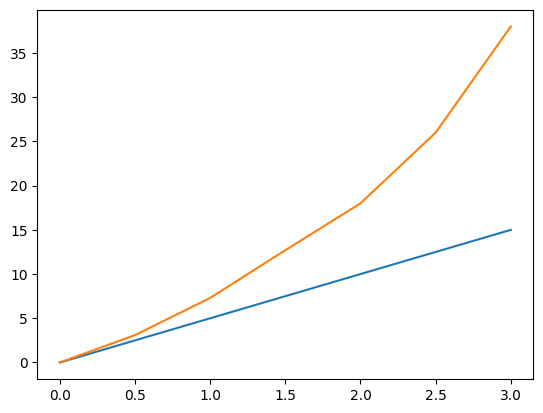

In [15]:
y2 = df['Runner 2 Distance']
fig, ax = plt.subplots()
ax.plot(X, y1)
ax.plot(X, y2);

**Scatter Plot with ax.scatter()**

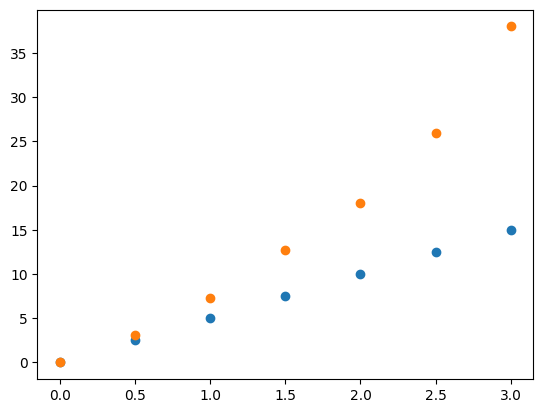

In [16]:
# Use ax.scatter to plot the values without a line
fig, ax = plt.subplots()
ax.scatter(X, y1)
ax.scatter(X, y2);

**Bar Charts with ax.bar()**

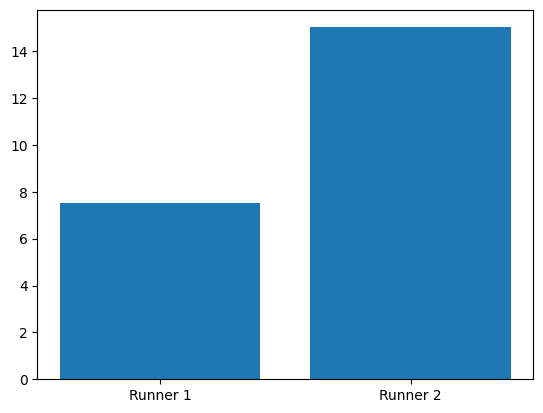

In [17]:
# plot the average of each as a bar
runner1_mean = y1.mean()
runner2_mean = y2.mean()
bar_labels = ["Runner 1","Runner 2"]
fig, ax = plt.subplots()
ax.bar(bar_labels, [runner1_mean, runner2_mean]);


**Question**: Describe the last 3 graphs we plotted

**Adding Labels and a Legend**

We can use the "label" argument in ax.plot/ax.scatter/etc. to provide a text label for the data. To see the labels, we need to add a legend with ax.legend().

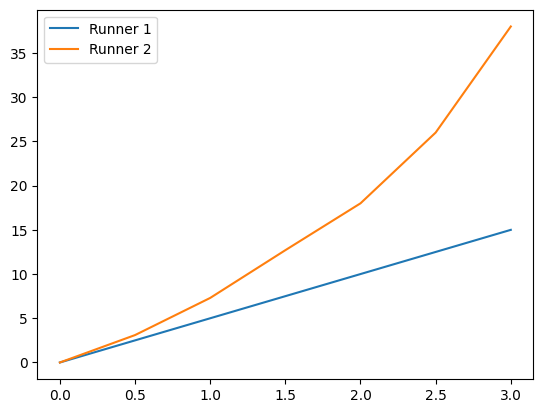

In [18]:
# Adding labels for each line and a legend
fig, ax = plt.subplots()
ax.plot(X, y1, label = "Runner 1")
ax.plot(X, y2, label = "Runner 2")
ax.legend();

**Adding Axis Labels and Title**  

We can also label the x-axis and y-axis using ax.set_xlabel() and ax.set_ylabel(). Finally, we should add a title to communicate what the graph is showing.

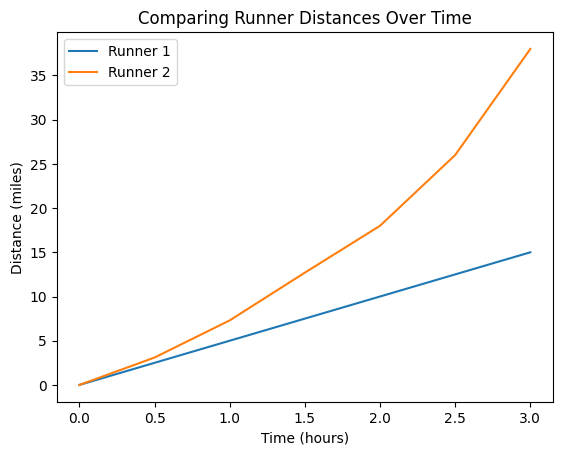

In [19]:
# Adding labels for each line and a legend
fig, ax = plt.subplots()
ax.plot(X, y1, label = "Runner 1")
ax.plot(X, y2, label = "Runner 2")
ax.legend()
# Adding axis labels and a title
ax.set_ylabel("Distance (miles)")
ax.set_xlabel("Time (hours)")
ax.set_title("Comparing Runner Distances Over Time");


#### OR  
A single line of code with ax.set()

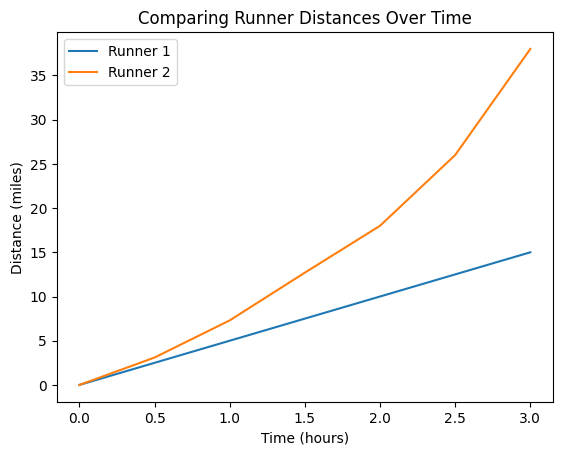

In [20]:
# Adding labels for each line and a legend
fig, ax = plt.subplots()
ax.plot(X, y1, label = "Runner 1")
ax.plot(X, y2, label = "Runner 2")
ax.legend()
# Using ax.set to customize
ax.set(ylabel= "Distance (miles)", xlabel = "Time (hours)", title = "Comparing Runner Distances Over Time");

## Practise exercise

Recreate Interest vs Principal Graph (Practice)
Task
The dataset given to you [here](https://docs.google.com/spreadsheets/d/e/2PACX-1vSdgsW4J8l9V8UlKLuwdYdqyemwkAuTHzS4s6plb-BQIJ8DhI8BkNDvO_Ei3M4lBJElVEaueyOg1Jkj/pub?output=csv) is the mortgage dataset used previously in this course. Your goal is to reproduce the graph. The black plot is the 30 year mortgage at 5% and the blue line is the 30 year mortgage at 3%. What is graphed is the cumulative interest paid over the course of the loan. Note that this isn't a beautiful graph. It doesn't say which line is for which mortgage and the graph itself isn't the most visually appealing graph, but it is a great start towards visualizing your data!

Use Python to recreate this graph:
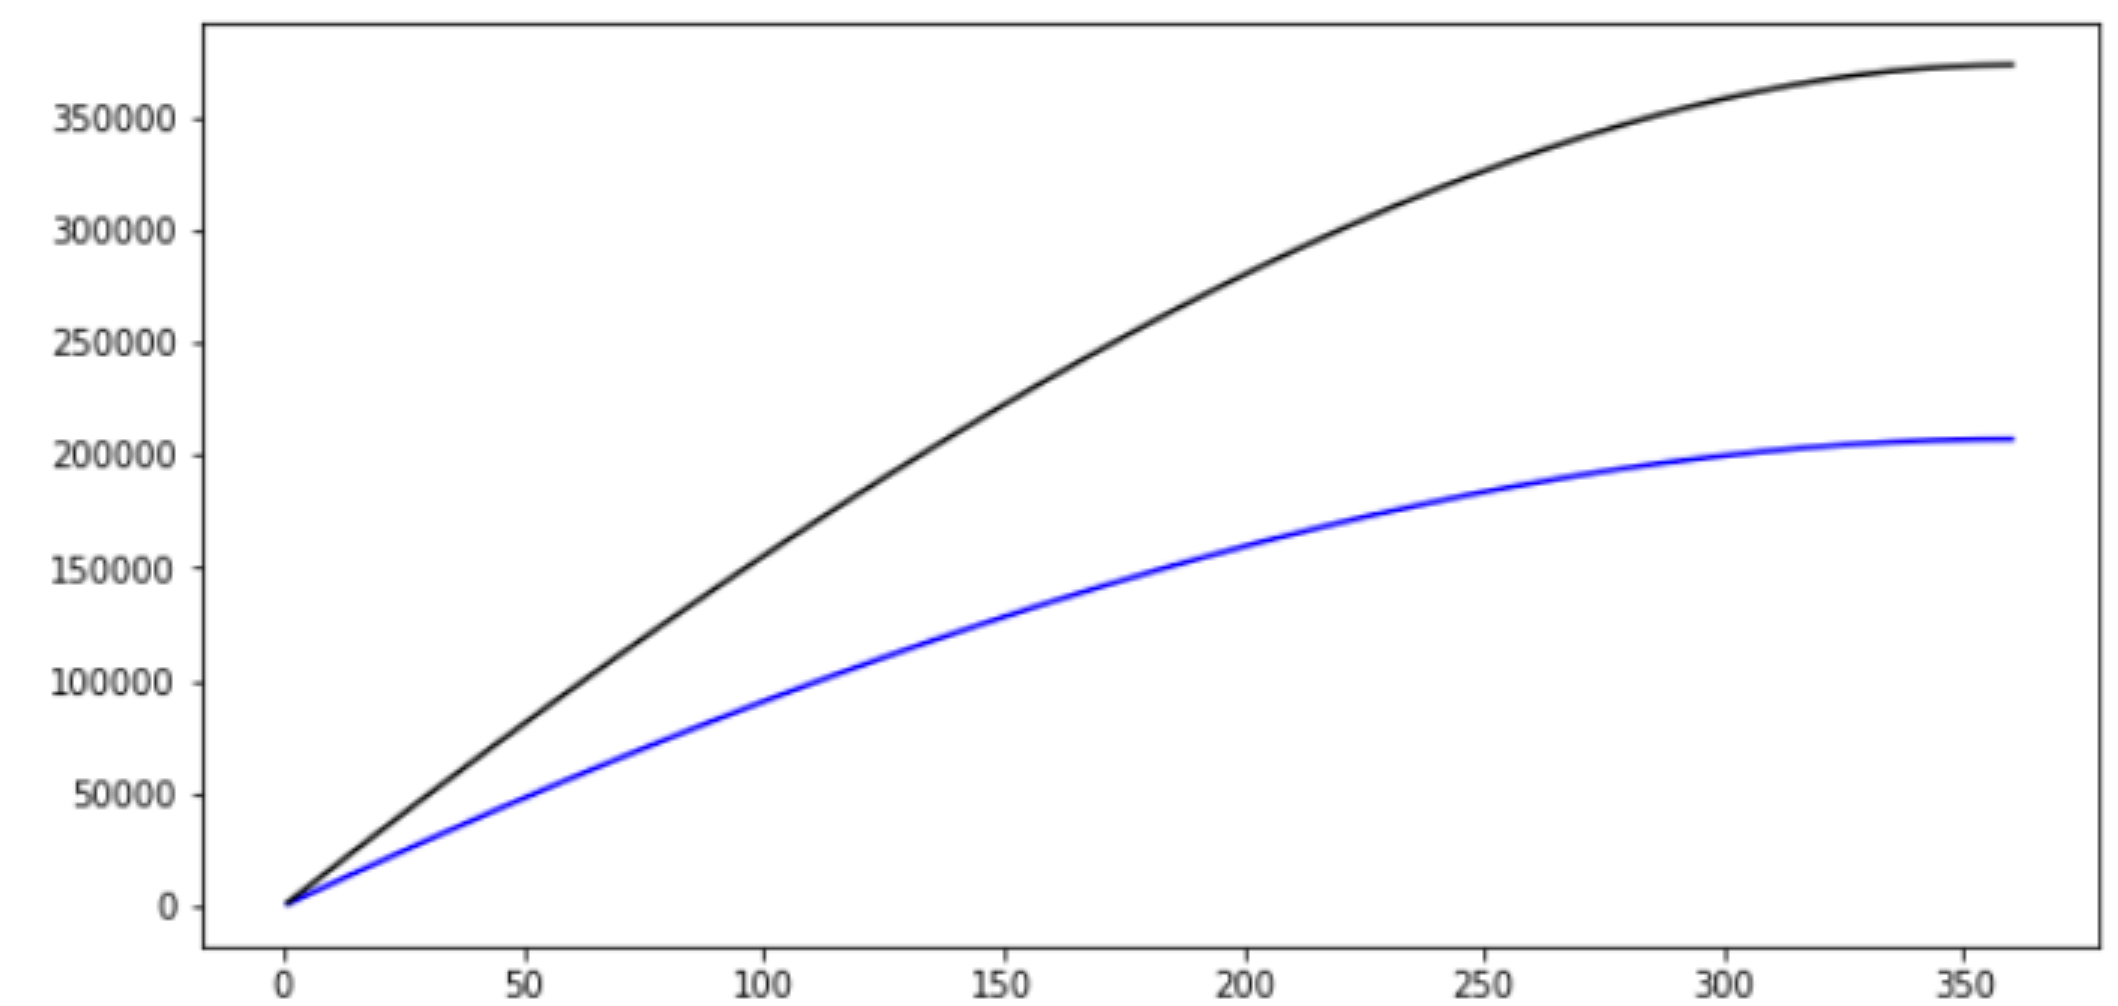  
Don't forget to mount your drive, import libraries, upload your data, and smile!!

1. Create a filter so the Mortgage Name is '30 Year'.  Use the len() to find how many rows correspond to 30 years.

2. Create a filter for an interest rate of 3% (notice how it is written in the data!).  

3. Define a new dataframe based on both the year and the interest filters you have created.  

4. We have a choice for the 5% interest rate:

We can just create another filter where df.['Interest Rate'] == .05

OR

We can use the negate symbol (~) with our current filter to give us everything EXCEPT what we have defined in the filter. This works here because we only have two interest rates (any value that is NOT 3% is 5%)

5. Since we want to graph the cumulative sum of the interest paid, you can use the function .cumsum().  What are the first three values in the output for the cumulative sum of the 3% rate?

6. Use plt.plot(x, y, c=color) to plot the black line (5%).  We want the x values to be the ['Month'] and the y values to be the cumulative sum of the Interest Paid.  You can use the code from the previous question to define your y values within the plt.plot() function!  Hint: for black, c = 'k'

7. To get both lines on the same graph, just put two plt.plot() functions one after the other in same code block and run it!

# Univariate Visualizations
When we begin exploring the columns/features in our dataset, we will need to explore each column independently to understand its values. Thus, we will start by visualizing each feature on its own (univariate visualizations).

The visualizations we select will vary based on the data type of the feature.

### Numeric features
For numeric features, we will visualize the distribution of the range of values included in the column. Examples include histograms and boxplots.


**Histogram**  

**Boxplot**  


<img src="https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/1681854825__.PNG" width="60%">

### Categorical features

We will apply visualizations that show how many occurrences of each category appear within the column.

**Bar Plots**
<img src="https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/1681854649__.PNG">

## Histograms  
We shall use data from [here](https://drive.google.com/file/d/1UnL59IupYrZd6f3oxkZxttYiNTxDVNMR/view?usp=drive_link) for this section.

[Data Dictionary](https://docs.google.com/document/d/1nmnel7g35aMOl0mKiSsTHXT8wRzbJ1EktKNqYFEmpWE/edit#heading=h.d3dnoomkm9yn)

In [21]:
# Import new libraries
import seaborn as sns
import numpy as np

In [22]:
# Connect to google drive

In [23]:
# Uncomment to modify your row display limit
# pd.set_option('display.max_columns',100)

In [26]:
# Load data
filename = "/content/drive/MyDrive/REFACTORY/jeremy/ames-housing-cleaned-eda.csv"
df = pd.read_csv(filename)
df.head()

,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,SalePrice,Month,Year,Total Full Baths,Total Half Baths
0,907227090,RL,60,7200,Pave,MISSING,AllPub,CollgCr,1Fam,1Story,...,297.0,TA,TA,Y,MnPrv,119900.0,3,2006,1.0,0.0
1,527108010,RL,134,19378,Pave,MISSING,AllPub,Gilbert,1Fam,2Story,...,576.0,TA,TA,Y,MISSING,320000.0,3,2006,3.0,1.0
2,534275170,RL,-1,12772,Pave,MISSING,AllPub,NAmes,1Fam,1Story,...,301.0,TA,TA,Y,MISSING,151500.0,4,2007,1.0,0.0
3,528104050,RL,114,14803,Pave,MISSING,AllPub,NridgHt,1Fam,1Story,...,1220.0,TA,TA,Y,MISSING,385000.0,6,2008,3.0,0.0
4,533206070,FV,32,3784,Pave,Pave,AllPub,Somerst,TwnhsE,1Story,...,476.0,TA,TA,Y,MISSING,193800.0,2,2007,3.0,0.0


It is a common practice to create histograms to explore your data, as it can give you a general idea of what your data looks like.

A histogram is a type of frequency distribution which means it shows the number of samples (frequency) that occur in a particular range of values (called a bin). This helps us visualize the variation in our data.

Histograms work by binning the entire range of values into a series of intervals and then counting how many values fall into each interval.

<Axes: >

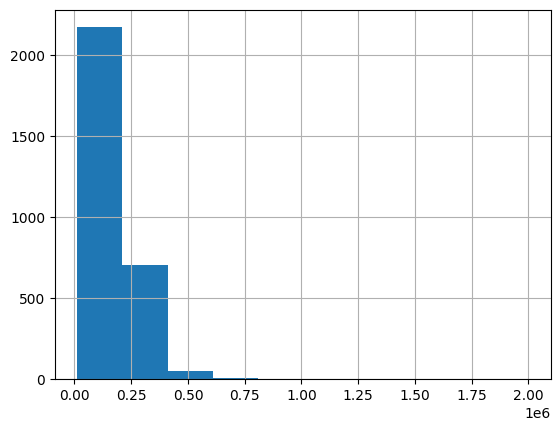

In [27]:
# Let us consider the SalePrice coloumn
df['SalePrice'].hist()
# Note how pandas wraps some matplotlib methods just like it does for numpy
# Also see that this returns an Axes object which we can modify as seen previously

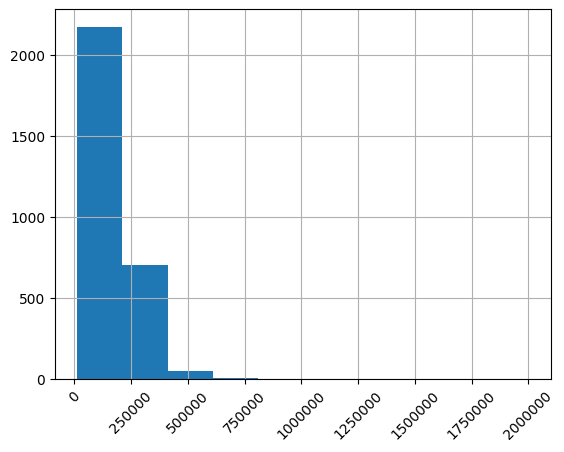

In [28]:
# saving the ax from .hist()
ax = df['SalePrice'].hist()

# Remove scientific notation
ax.ticklabel_format(style='plain');

# rotate your xticklabels
ax.tick_params(axis='x', rotation=45)

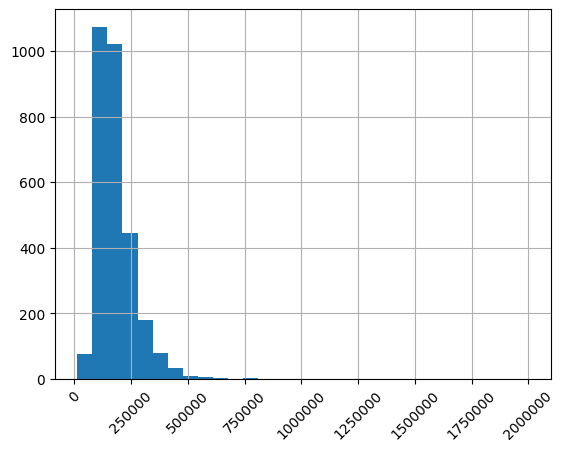

In [29]:
# Change number of bins to 30
ax = df['SalePrice'].hist(bins = 30)
ax.tick_params(axis='x', rotation = 45)
ax.ticklabel_format(style='plain')


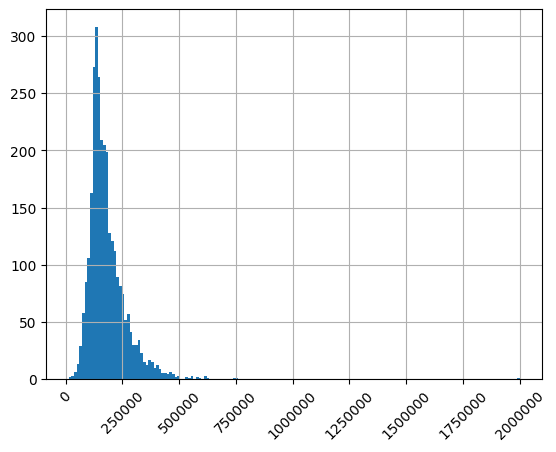

In [30]:
# Change number of bins to auto will generally give us the matplotlib calculated best number of bins
ax = df['SalePrice'].hist(bins = 'auto')
ax.tick_params(axis='x', rotation = 45)
ax.ticklabel_format(style='plain')



Text(0, 0.5, 'Number of Houses')

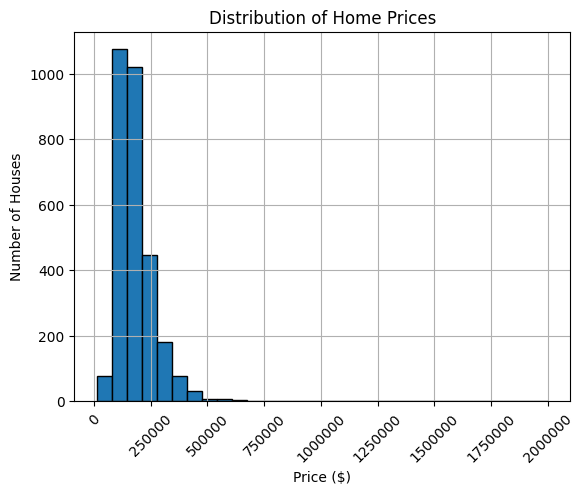

In [31]:
# Add title and labels and edges around each bin for better visibility
ax = df['SalePrice'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 45)
ax.ticklabel_format(style='plain')
ax.set_title('Distribution of Home Prices')
ax.set_xlabel('Price ($)')
ax.set_ylabel('Number of Houses')




### Using Seaborn's sns.histplot
Seaborn has a sns.histplot function to create histograms.

The best way to use Seaborn's plotting functions is to pass in the entire DataFrame as the data argument, and then just the column names for x or y.

Seaborn will return a Matplotlib Axes that we can continue to work with, as we did earlier in the lesson using Panda's .hist().

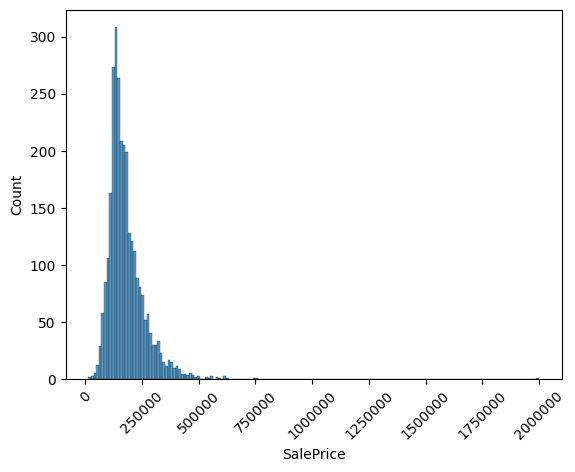

In [32]:
# Use seaborn's histplot function and save the ax
ax = sns.histplot(data=df, x="SalePrice")
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);

**Advantages of Seaborn's Histplot**  

Seaborn's plotting functions generally have many convenient parameters that make it easy to modify the resulting visualization without additional work.

For example, let's say we wanted to make bins for SalePrice that are \$50,000 wide. The first bin would cover \$0 to \$50,000, and the next would cover \$50,000-$100,00, and so on.

If we tried to do this with Pandas/Matplotlib, we would have to manually create the list of bins and pass it in as the "bins" argument, but with Seaborn, we can simply specify the bin_width parameter.

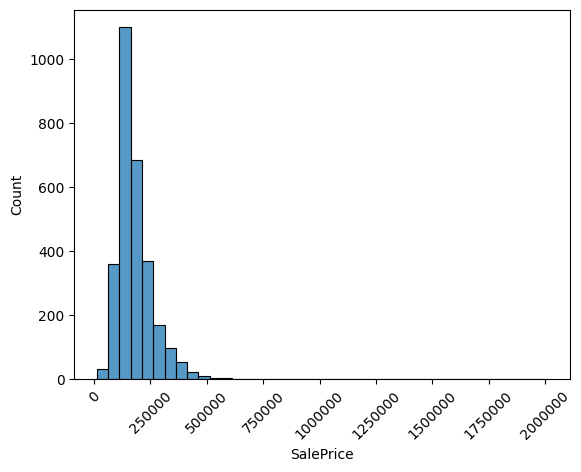

In [33]:
# Use binwidth arg to make histogram with $50k bins
ax = sns.histplot(data=df, x='SalePrice', binwidth=50_000)
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);

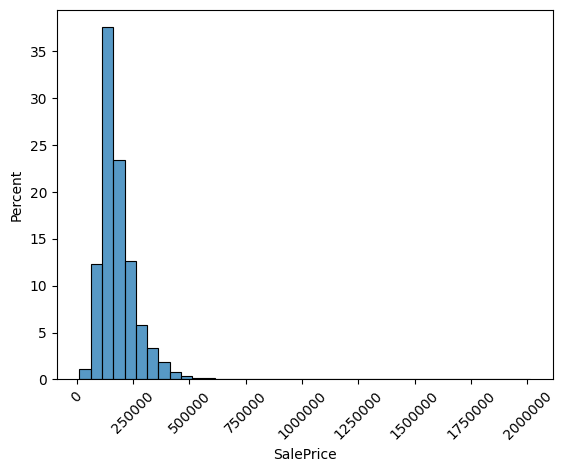

In [34]:
# Use binwidth arg to make histogram with $50k bins and plot as % of total
ax = sns.histplot(data=df, x='SalePrice', binwidth=50_000, stat='percent')
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);


### Annotating Histograms with more Information

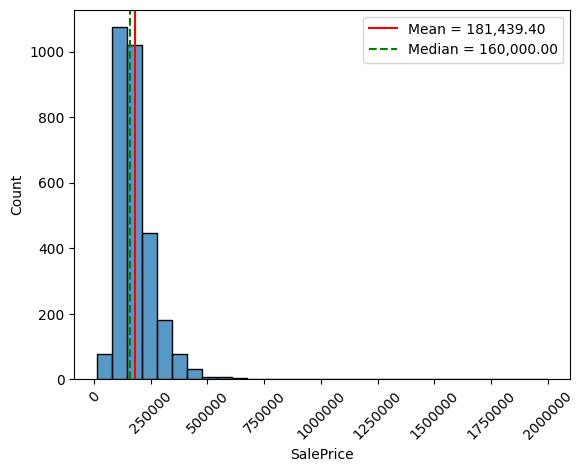

In [35]:
# Get the mean
mean = df['SalePrice'].mean()

# Get the median
median = df['SalePrice'].median()

ax = sns.histplot(data=df, x='SalePrice', bins=30)
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);
ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
ax.legend();

### How about the shape of the distribution

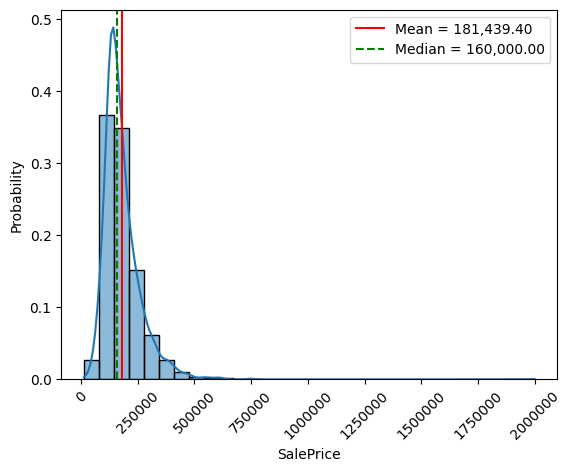

In [36]:
# We can pass the
# Get the mean
mean = df['SalePrice'].mean()

# Get the median
median = df['SalePrice'].median()

ax = sns.histplot(data=df, x='SalePrice', bins=30, stat='probability', kde=True)
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);
ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
ax.legend();

## Box Plots

<img src="https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/boxplot_20491038.png">  

Image source: Michael Galarnyk  

A boxplot (also called a box and whisker plot) is a standardized way of displaying the distribution of data based on a five-number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. Outliers are values that are dramatically different than the other values. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed. The parts of a boxplot are defined below:

* median (Q2/50th Percentile): the middle value of the dataset.
* first quartile (Q1/25th Percentile): the middle number between the smallest number (not the “minimum”) and the median of the dataset.
* third quartile (Q3/75th Percentile): the middle value between the median and the highest value (not the “maximum”) of the dataset.
* interquartile range (IQR): 25th to the 75th percentile. Note that the middle 50% of the values fall within the IQR.
* whiskers (shown in blue)
* outliers (shown as green circles)
* “maximum”: Q3 + 1.5*IQR
* “minimum”: Q1 -1.5*IQR




[Undertanding](https://login.codingdojo.com/m/551/13198/92441) [Boxplots](https://builtin.com/data-science/boxplot)

The data for this section is the same as what we have been using above and be downloaded from [here](https://drive.google.com/file/d/1UnL59IupYrZd6f3oxkZxttYiNTxDVNMR/view).

In [37]:
# Using the describe() method to summarize  stats for Living Area Sqft
df['Living Area Sqft'].describe()

count    2930.000000
mean     1499.690444
std       505.508887
min       334.000000
25%      1126.000000
50%      1442.000000
75%      1742.750000
max      5642.000000
Name: Living Area Sqft, dtype: float64

**Boxplots using matplotlib**

First, let's take a look at the entire distribution of the Living Area Sqft column

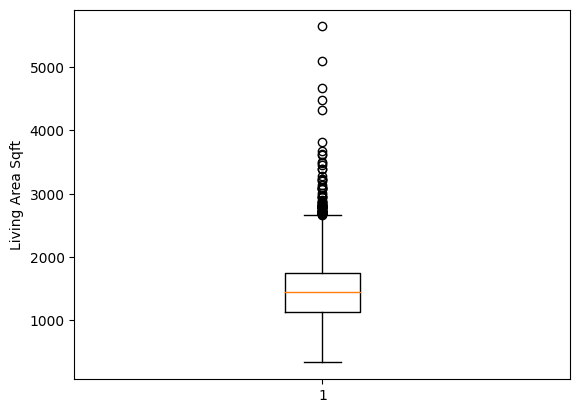

In [38]:
# create boxplot for the entire dataset
fig, ax = plt.subplots()
data = df["Living Area Sqft"]
ax.boxplot(data);
ax.set_ylabel("Living Area Sqft");

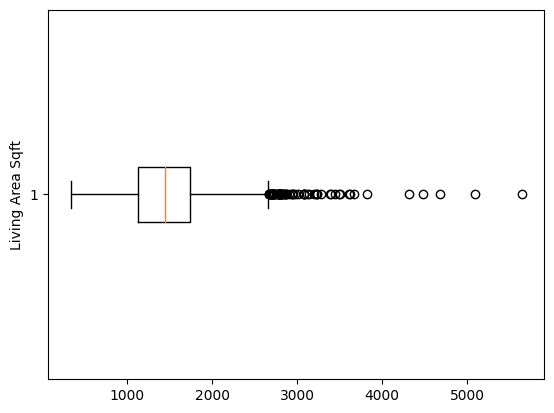

In [39]:
# making the boxplot horizontal with the vert argument
fig, ax = plt.subplots()
ax.boxplot(data, vert = False);
ax.set_ylabel("Living Area Sqft");

**Boxplots using pandas**  
Pandas can be used as a wrapper around Matplotlib. One reason why you might want to plot using Pandas is that it requires less code.

We are going to create a boxplot to show how much less syntax you need to create the plot with pandas vs pure matplotlib.

<Axes: >

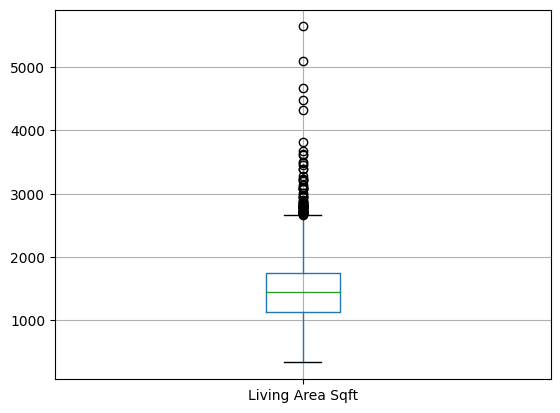

In [40]:
# Plotting with pandas
df.boxplot(column ="Living Area Sqft")

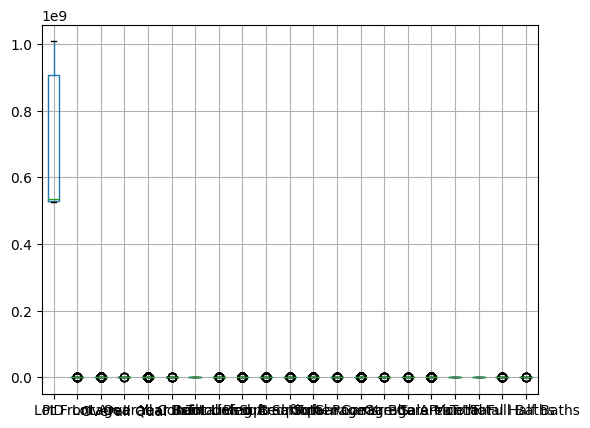

In [41]:
#  Create a boxplot with each feature
ax = df.boxplot();

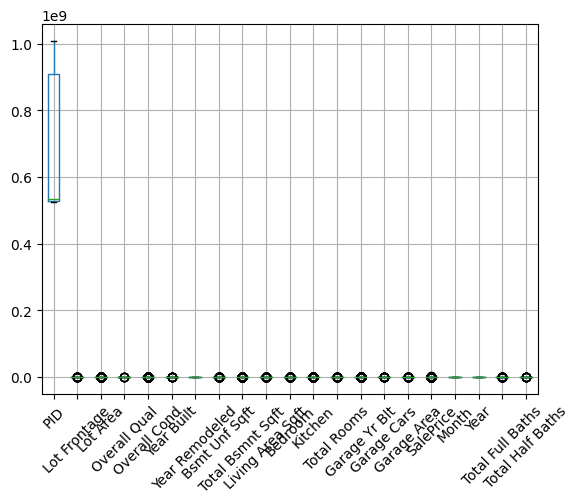

In [42]:
# Modify the returned axes object
# Rotate the tick labels
ax = df.boxplot(rot=45)

**Using ax.set_xticklabels to rotate and align tick labels**

A better approach, that will work for any Axes object is to use ax.set_xticklabels(). This method requires that we provide the text labels as the first argument. We can grab the current xtick labels that we want to rotate by using ax.get_xticklabels().

We can then specify rotation=45 to rotate the labels. Finally, we can align the end of tick labels to the tick marks by also specifying horizontalalignment='right'. (You can also use the more convenient abbreviation ha='right')

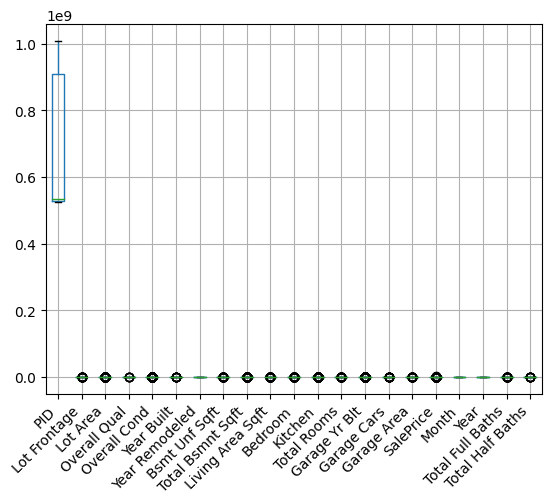

In [43]:
# Create a boxplot with all features and rotating xtick labels
ax = df.boxplot()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

**Boxplots using seaborn**  
We can also use Seaborn's boxplot function.

Reminder: to get the best results with Seaborn:
Pass in your entire dataframe as the data argument
Then pass in the column names from your dataframe as the arguments for x and y.
If we want to create a vertical boxplot, we will pass our column name as the y argument.

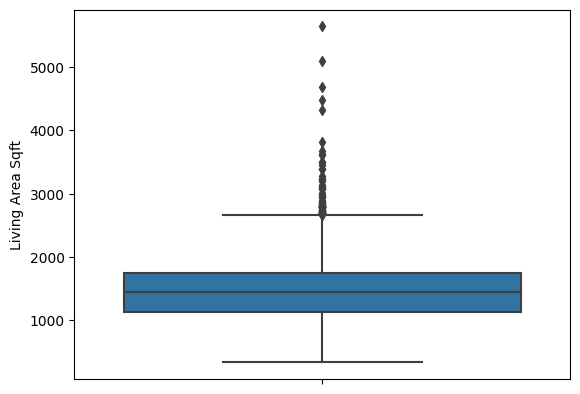

In [44]:
# Create a vertical boxplot
ax = sns.boxplot(data=df, y="Living Area Sqft")

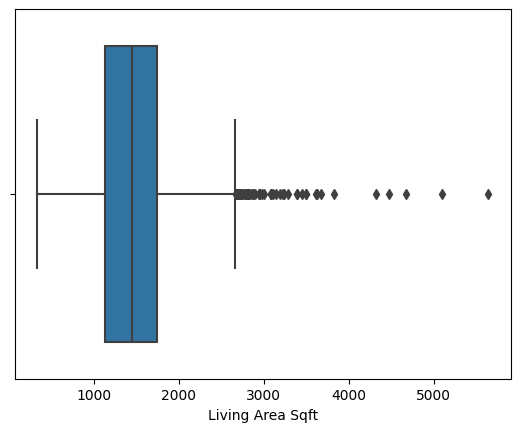

In [45]:
# Create a horizontal boxplot by passing x
ax = sns.boxplot(data=df, x="Living Area Sqft")

**Creating Boxplots By Group**  

While we are focusing on boxplots to explore the distribution of a single feature. We can also create a boxplot with the groups from another column separated.

For example, if we wanted to compare the Living Area Sqft boxplot for homes that have central air vs. ones that do, we can add x='Central Air' to our vertical boxplot:

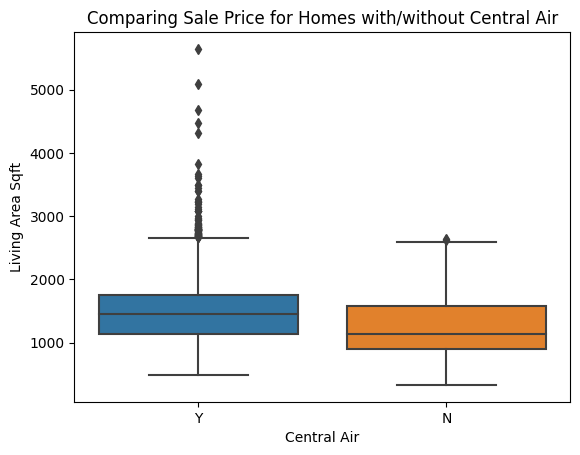

In [46]:
# Grouped boxplot in seaborn
ax = sns.boxplot(data=df, x='Central Air', y="Living Area Sqft")
ax.set_title("Comparing Sale Price for Homes with/without Central Air");

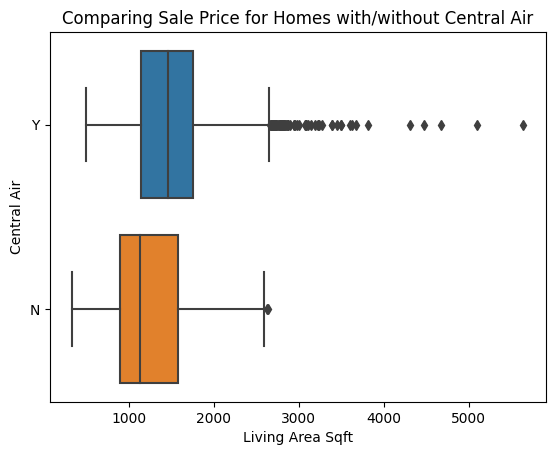

In [50]:
# Horizontal grouped boxplot in seaborn horizontally
ax = sns.boxplot(data=df, y='Central Air', x="Living Area Sqft")
ax.set_title("Comparing Sale Price for Homes with/without Central Air");

### Univariate Categorical Plots  
When it comes to visualizing the values within a categorical feature, we have fewer types of visuals to select from.

Ultimately, we simply want to show the counts for how many times each category appears in a feature.

We have previously obtained this information with Panda's using Series.value_counts(). We will walk through how to convert that into a visualization.  

NOTE: We shall use the same [data](https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fdrive.google.com%2Ffile%2Fd%2F1UnL59IupYrZd6f3oxkZxttYiNTxDVNMR%2Fview%3Fusp%3Dshare_link) as above.

In [47]:
# Revisit our dataset
df.head()

,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,SalePrice,Month,Year,Total Full Baths,Total Half Baths
0,907227090,RL,60,7200,Pave,MISSING,AllPub,CollgCr,1Fam,1Story,...,297.0,TA,TA,Y,MnPrv,119900.0,3,2006,1.0,0.0
1,527108010,RL,134,19378,Pave,MISSING,AllPub,Gilbert,1Fam,2Story,...,576.0,TA,TA,Y,MISSING,320000.0,3,2006,3.0,1.0
2,534275170,RL,-1,12772,Pave,MISSING,AllPub,NAmes,1Fam,1Story,...,301.0,TA,TA,Y,MISSING,151500.0,4,2007,1.0,0.0
3,528104050,RL,114,14803,Pave,MISSING,AllPub,NridgHt,1Fam,1Story,...,1220.0,TA,TA,Y,MISSING,385000.0,6,2008,3.0,0.0
4,533206070,FV,32,3784,Pave,Pave,AllPub,Somerst,TwnhsE,1Story,...,476.0,TA,TA,Y,MISSING,193800.0,2,2007,3.0,0.0


In [52]:
# Using select dtypes to get names of categorical columns
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['MS Zoning', 'Street', 'Alley', 'Utilities', 'Neighborhood',
       'Bldg Type', 'House Style', 'Exter Qual', 'Exter Cond', 'Central Air',
       'Garage Type', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Fence'],
      dtype='object')

In [49]:
# Checking how many categories in each column
df[cat_cols].nunique()

MS Zoning        7
Street           2
Alley            3
Utilities        3
Neighborhood    28
Bldg Type        5
House Style      8
Exter Qual       4
Exter Cond       5
Central Air      2
Garage Type      7
Garage Qual      6
Garage Cond      6
Paved Drive      3
Fence            5
dtype: int64

In [53]:
# Saving the value counts for one column (Alley)
val_counts = df['Alley'].value_counts()
val_counts

MISSING    2732
Grvl        120
Pave         78
Name: Alley, dtype: int64

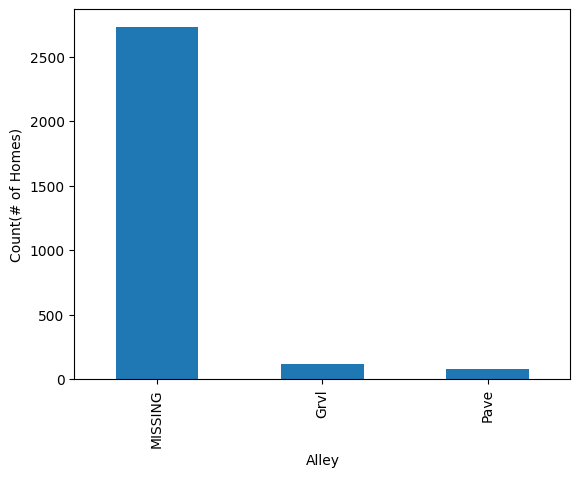

In [54]:
# Create a bar plot for the Alley category counts

# Plot value counts as a bar graph
ax = val_counts.plot(kind='bar')
ax.set_ylabel("Count(# of Homes)");
ax.set_xlabel("Alley");

We can also plot these as a frequency of the using the normalized value counts.


In [55]:
# Get the Normalized Value Counts
val_counts_norm = df['Alley'].value_counts(normalize=True) * 100
val_counts_norm

MISSING    93.242321
Grvl        4.095563
Pave        2.662116
Name: Alley, dtype: float64

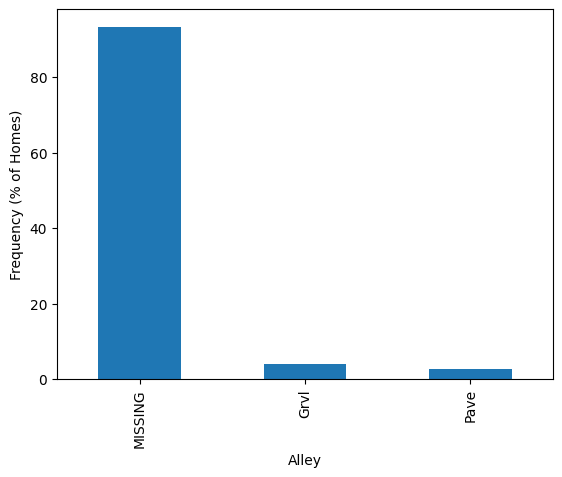

In [56]:
# Plot value counts as a bar graph
ax = val_counts_norm.plot(kind='bar')
ax.set_ylabel("Frequency (% of Homes)");
ax.set_xlabel("Alley");

**Categorical Plots with Seaborn**  

Seaborn has a function designed to show the counts of each category in a column called sns.countplot. It also returns an Axes object, which we can save and continue to use to modify our graph.

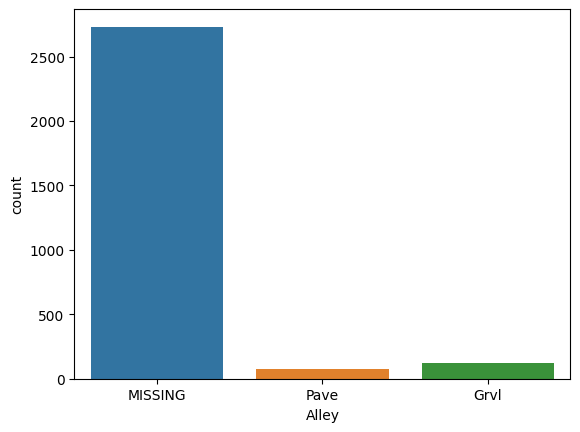

In [57]:
# Seaborn countplot for the Alley column
ax = sns.countplot(data=df, x="Alley")

**Visualizing Many Categories**

In [58]:
# Checking the nunique in cat_cols
df[cat_cols].nunique()

MS Zoning        7
Street           2
Alley            3
Utilities        3
Neighborhood    28
Bldg Type        5
House Style      8
Exter Qual       4
Exter Cond       5
Central Air      2
Garage Type      7
Garage Qual      6
Garage Cond      6
Paved Drive      3
Fence            5
dtype: int64

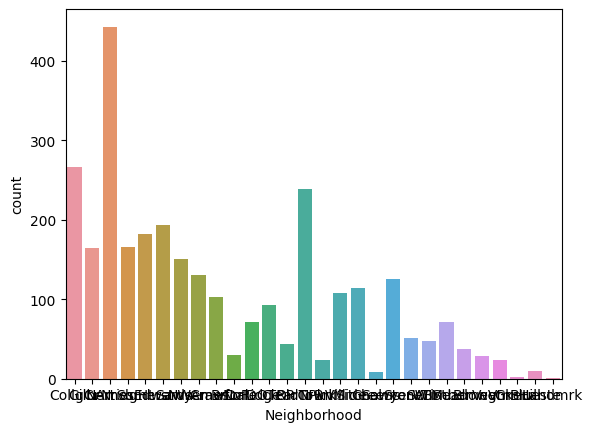

In [59]:
# Countplot with many categories for Neighbourhood column
ax = sns.countplot(data=df, x="Neighborhood")

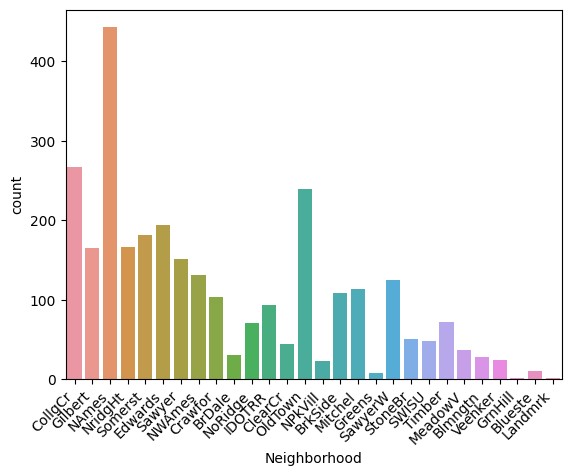

In [60]:
# Modifying Axes object
ax = sns.countplot(data=df, x="Neighborhood")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

We can also specify the order in which the categories are plotted

In [61]:
# Saving the value_counts to use with seaborn
# Value counts returns this in descending order
val_counts = df['Neighborhood'].value_counts()
val_counts.head(10)

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Name: Neighborhood, dtype: int64

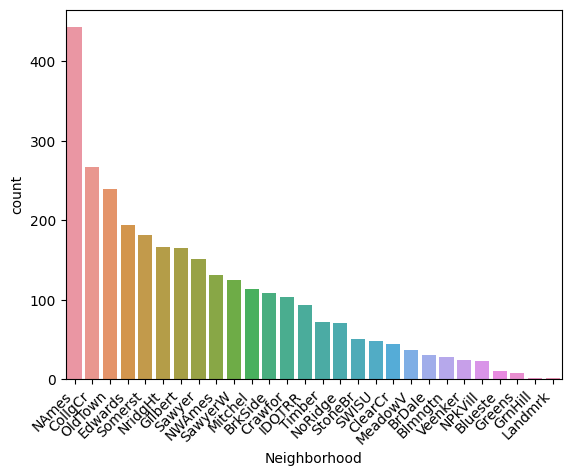

In [62]:
# Creating a Countplot with seaborn (ordered by count)
# We specify the order by passing the list from val_counts index which returns the list of our columns ordered by count in descending order
ax = sns.countplot(data=df, x="Neighborhood",
                   order=val_counts.index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

In [63]:
# Show the categories in scending order (Hint: use ascending parameter with the value_counts() method)